In [28]:
# settings for display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# turn off matplotlib figure axes, else we need to call axes('off') everytime
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.set_cmap('gray') 
mpl.rc('axes.spines',top=False,bottom=False,left=False,right=False)
mpl.rc(('xtick','ytick'),color=(1,1,1,0))
mpl.rc('font', size=20)

import warnings
warnings.filterwarnings("ignore")

# import necessarry libs
from imageio import imread
import numpy as np
from skimage.color import rgb2gray
from skimage.transform import resize
from reconstruction import reconstruction
from roi import new_ROI

In [2]:
# Lire une image
im = imread('montgolfiere.jpg')/255.0;

# rapetissons sa taille (c'est long sinon!)
im = resize(im, [375, 500]);

<IPython.core.display.Javascript object>


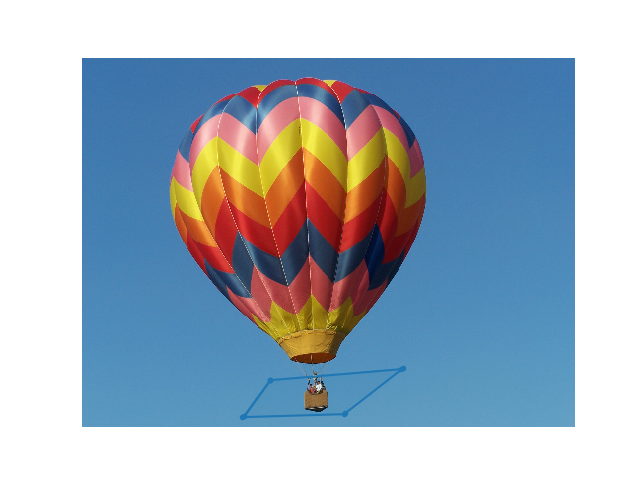


        Left button: add point; 
        middle button: delete point;
        right button: fill polygon and stop interaction.
        


In [10]:
# Demandons un masque
%matplotlib notebook
im_axis = plt.imshow(im);plt.axis('off')
roi = new_ROI(im_axis, shape='polygon')

In [11]:
m = roi.get_mask()
m = np.tile(m[:,:,np.newaxis], [1, 1, 3]);
print(m.shape)

(375, 500, 3)


In [12]:
# Calculons les gradients
gx = np.diff(im, 1, 1);
gy = np.diff(im, 1, 0);
print(gx.shape)

(375, 499, 3)


In [13]:
# Masquons les gradients!
gx[m[:,0:-1,:]] = 0; # gx[m]*2;
gy[m[0:-1,:,:]] = 0; # gy[m]*2;

In [14]:
# Reconstruisons l'image
from reconstruction import reconstruction
imRecon = np.zeros(im.shape);
for i_c in range(im.shape[-1]):
    imRecon[:,:,i_c] = reconstruction(gx[:,:,i_c], gy[:,:,i_c])

In [15]:
imRecon.mean()

0.029114869264920507

In [25]:
# Réglons les problèmes?
imMoyenne = np.mean(im[:]);
imReconMoyenne = np.mean(imRecon[:]);

offset = imMoyenne - imReconMoyenne;
print(offset)
imReconFix = imRecon + offset
imReconFix = np.maximum(0, np.minimum(1, imReconFix))

0.45458454645172264


<IPython.core.display.Javascript object>


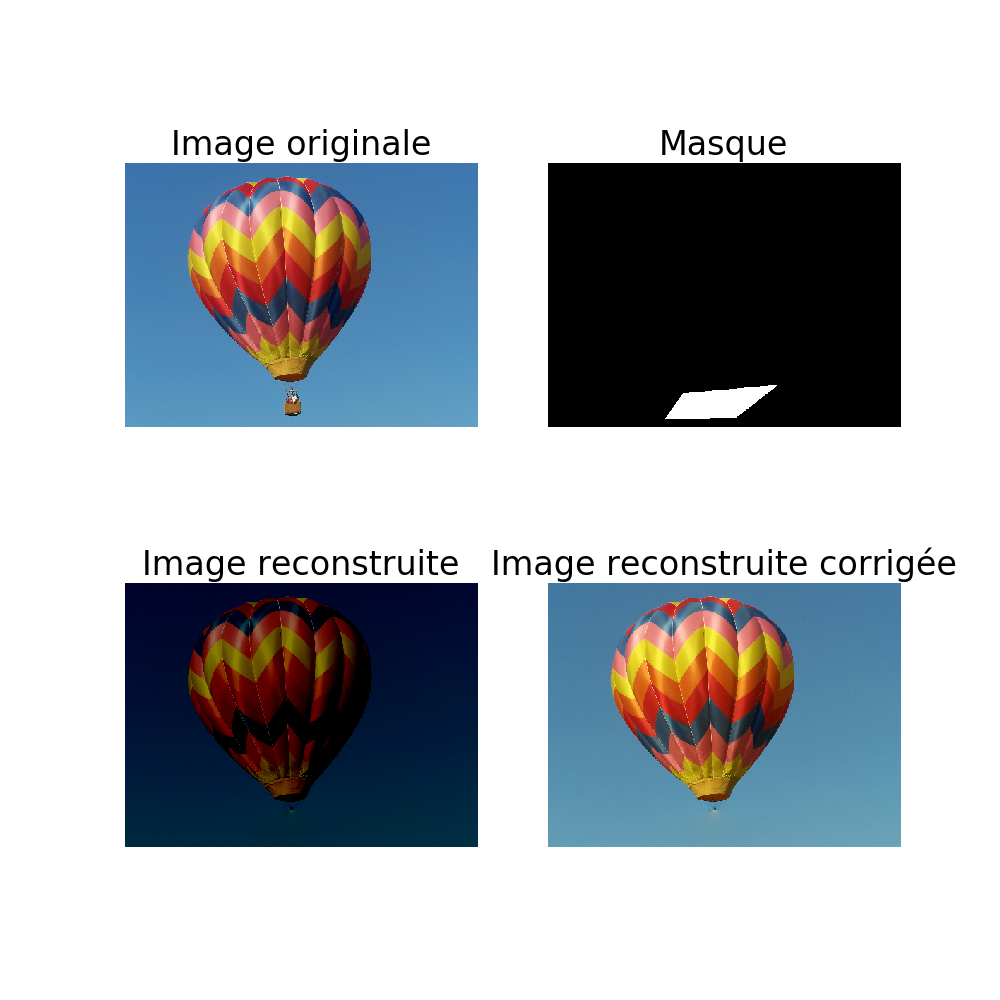

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [29]:
# Affichons les résultats
fig, ax = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True,num='reconstruite')
ax[0][0].imshow(im); ax[0][0].set_title('Image originale')
ax[0][1].imshow(m.astype('float')); ax[0][1].set_title('Masque');
ax[1][0].imshow(imRecon); ax[1][0].set_title('Image reconstruite');
ax[1][1].imshow(imReconFix); ax[1][1].set_title('Image reconstruite corrigée');
p